In [1]:
import sys
sys.path.append('..')

In [2]:
from hearts_ai.rl.results import (
    load_training_results,
    PlotMakerPlaying,
    print_best_eval_run,
)

In [3]:
def log_path(name: str) -> str:
    return f'../output/logs/final_training/{name}'


def out_path(name: str) -> str:
    return f'../output/plots/final_training/{name}'

In [4]:
r_mctsrl_full = load_training_results(log_path=log_path('mctsrl_full'))
r_mctsrl_compact = load_training_results(log_path=log_path('mctsrl_compact'))
r_ppo_full = load_training_results(log_path=log_path('ppo_full'))
r_ppo_compact = load_training_results(log_path=log_path('ppo_compact'))

# MCTS+RL Play & PPO Card Pass (full obs.)

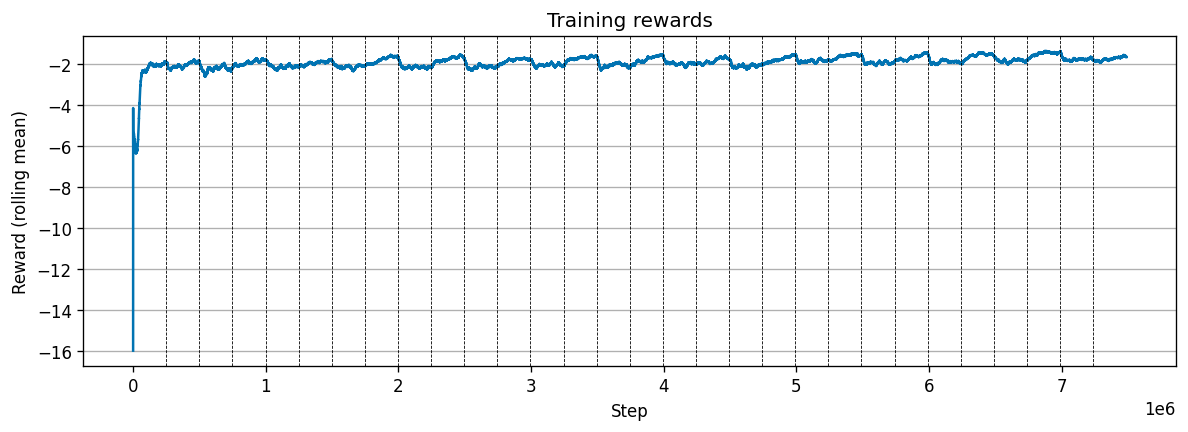

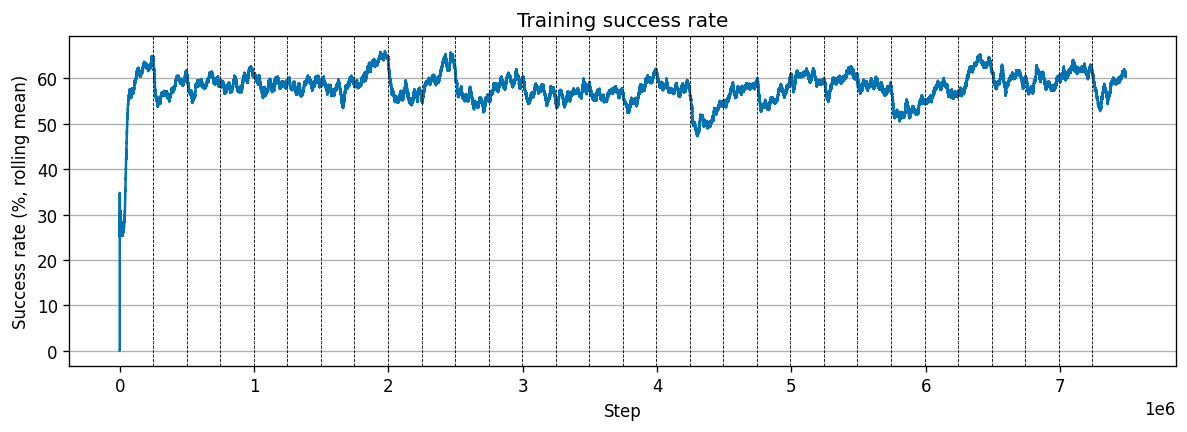

In [5]:
plot_maker_mctsrl_full = PlotMakerPlaying(r_mctsrl_full, folder=out_path('mctsrl_full_obs'), show=True)
plot_maker_mctsrl_full.plot_training()

# MCTS+RL Play & PPO Card Pass (compact obs.)

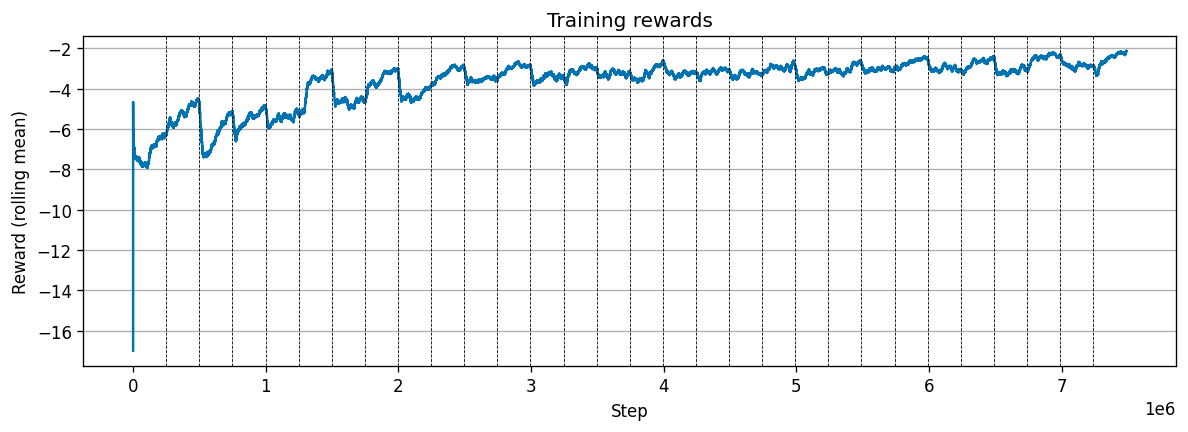

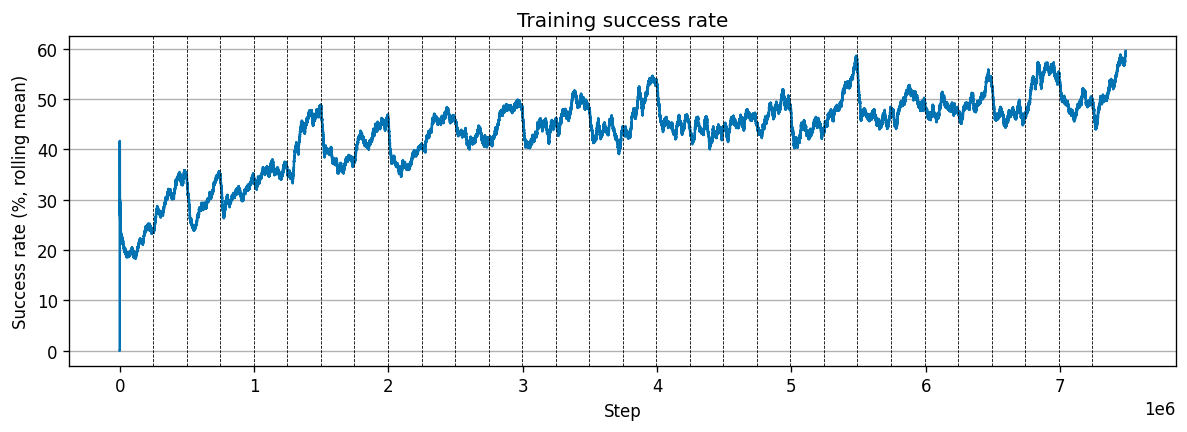

In [6]:
plot_maker_mctsrl_compact = PlotMakerPlaying(r_mctsrl_compact, folder=out_path('mctsrl_compact_obs'), show=True)
plot_maker_mctsrl_compact.plot_training()

# PPO Both Play & Card Pass (full obs.)

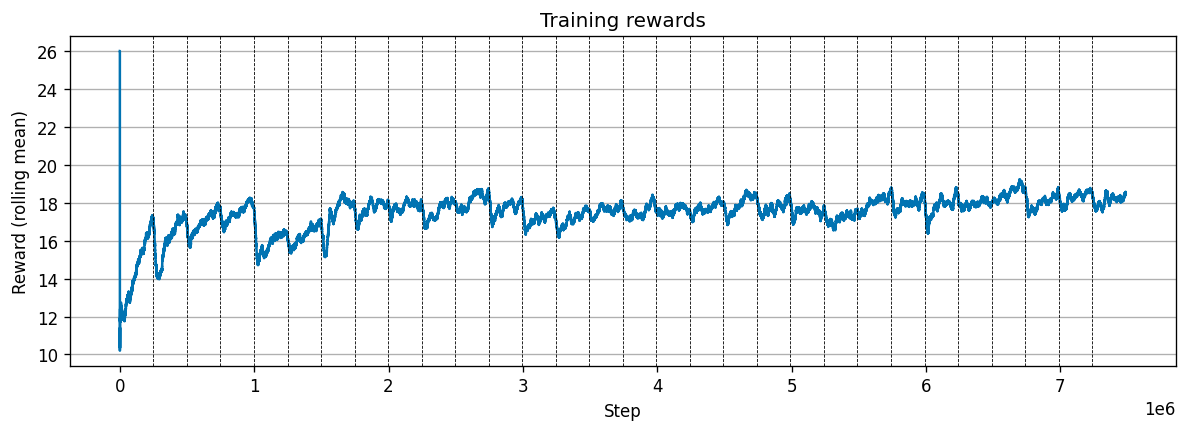

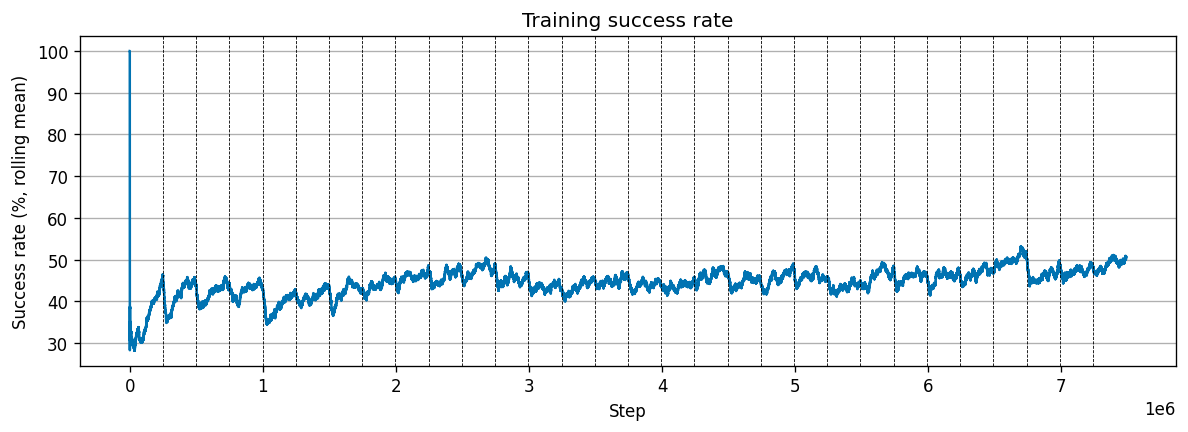

In [7]:
plot_maker_ppo_full = PlotMakerPlaying(r_ppo_full, folder=out_path('ppo_full_obs'), show=True)
plot_maker_ppo_full.plot_training()

# PPO Both Play & Card Pass (compact obs.)

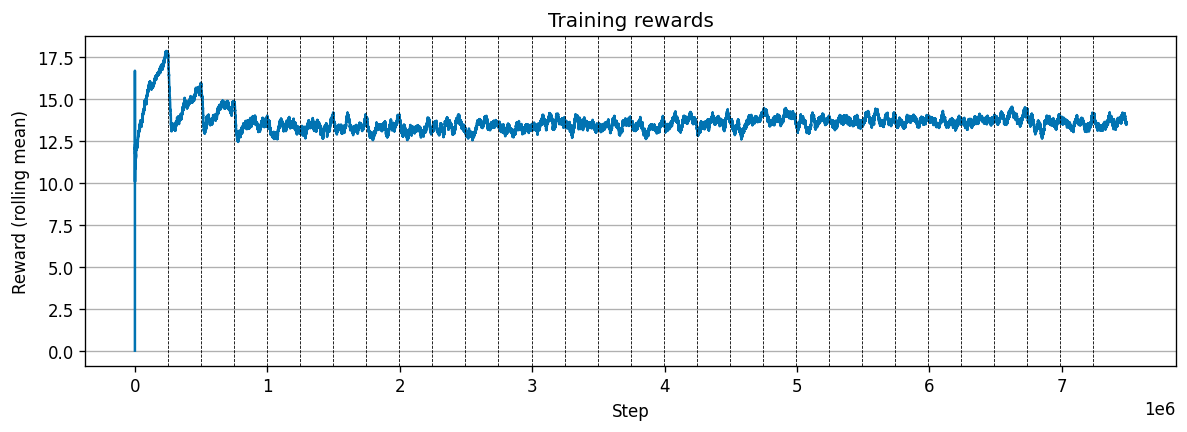

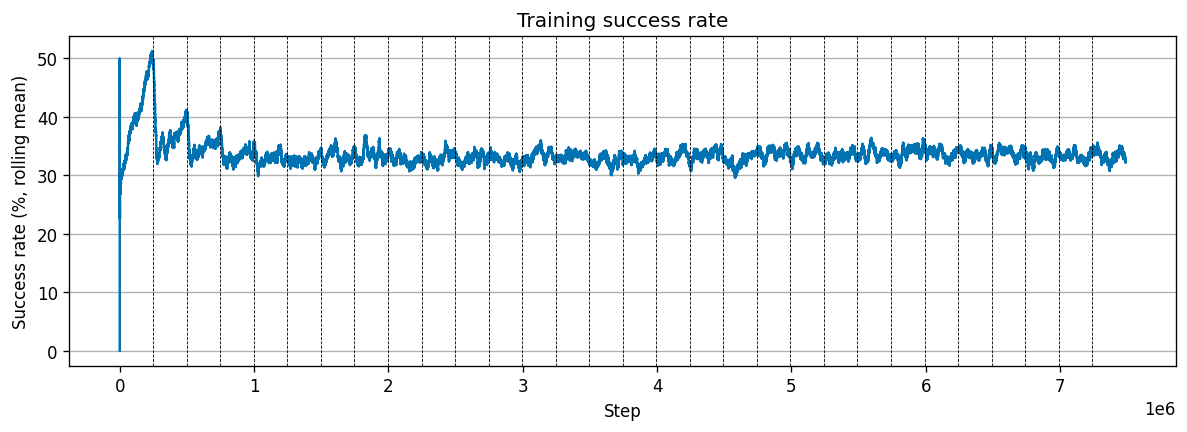

In [8]:
plot_maker_ppo_compact = PlotMakerPlaying(r_ppo_compact, folder=out_path('ppo_compact_obs'), show=True)
plot_maker_ppo_compact.plot_training()

# Comparison

In [9]:
plot_maker_compare = PlotMakerPlaying(
    results={
        'MCTS+RL Play & PPO Card Pass (full obs.)': r_mctsrl_full,
        'MCTS+RL Play & PPO Card Pass (compact obs.)': r_mctsrl_compact,
        'PPO Both Play & Card Pass (full obs.)': r_ppo_full,
        'PPO Both Play & Card Pass (compact obs.)': r_ppo_compact,
    },
    folder=out_path('comparison'),
    show=True,
)

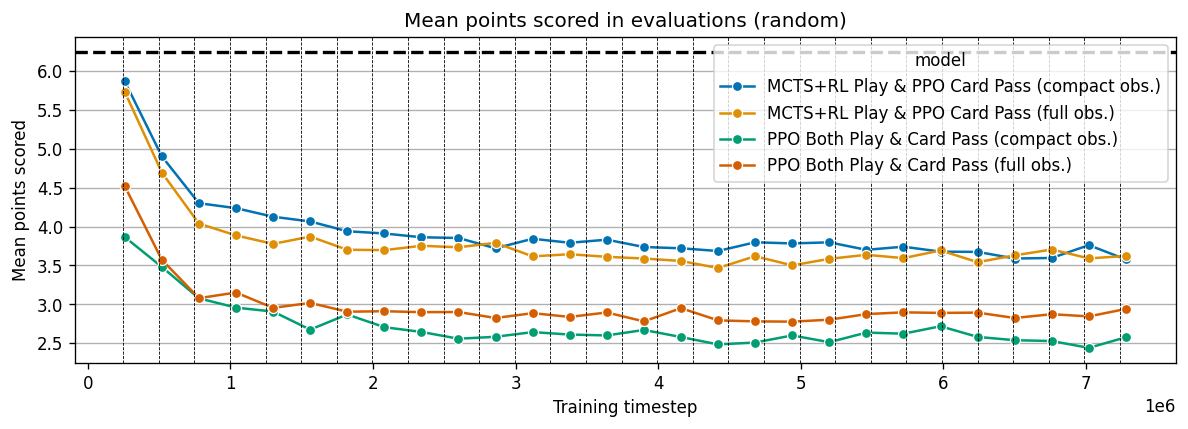

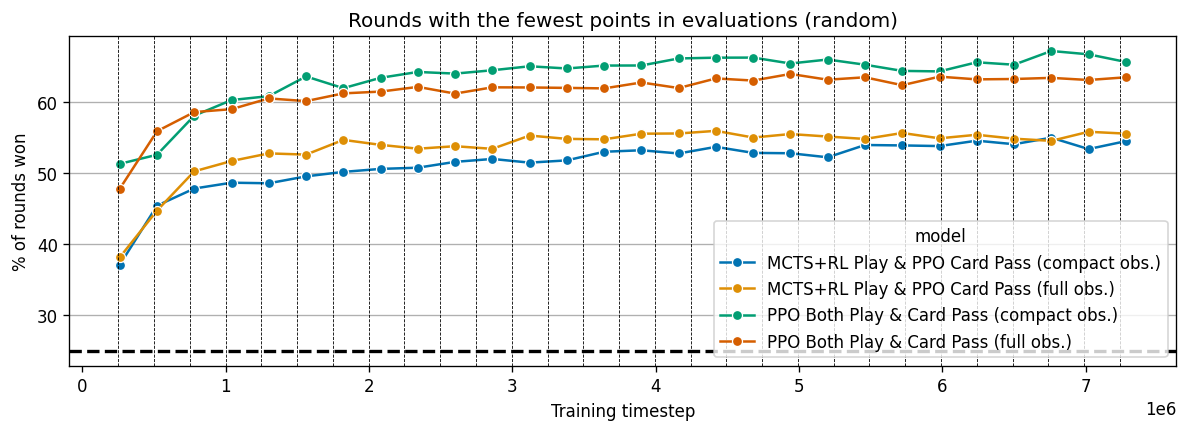

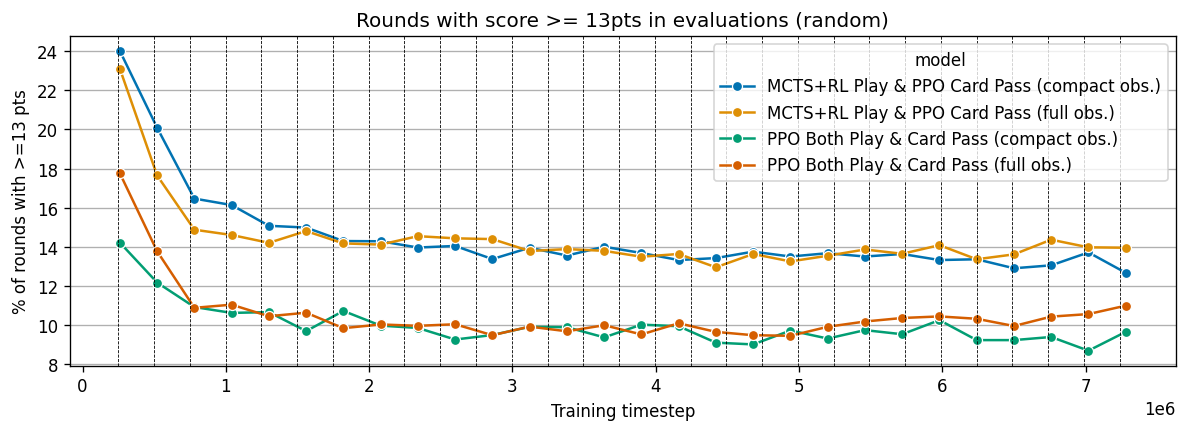

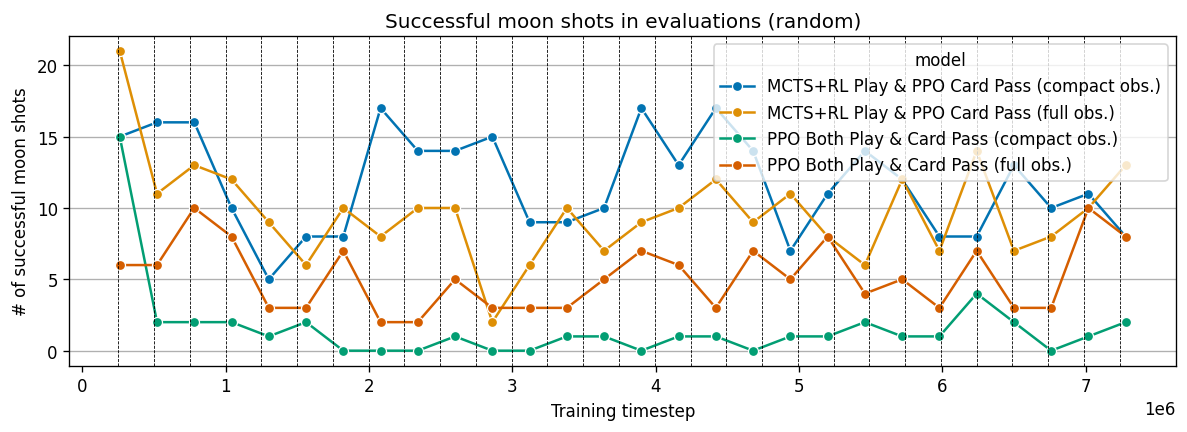

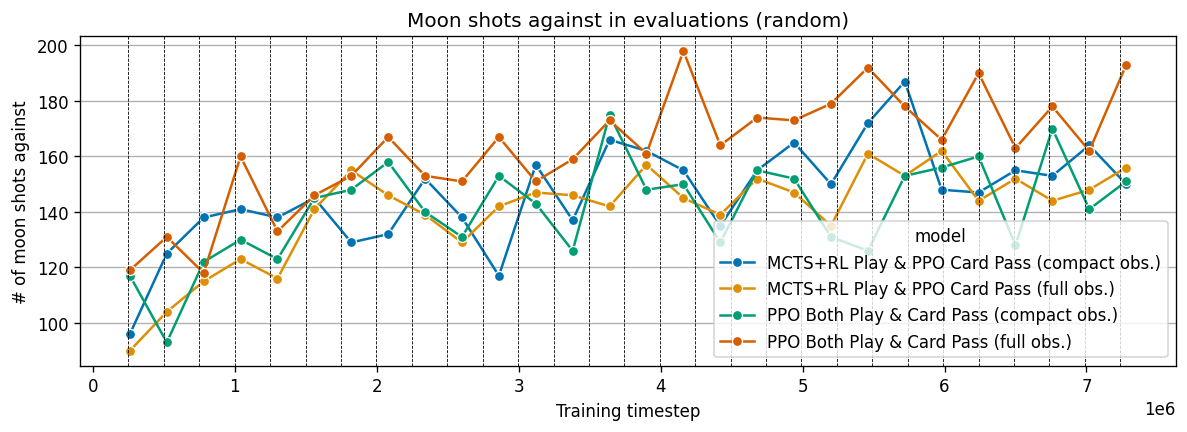

In [10]:
plot_maker_compare.plot_eval('random')

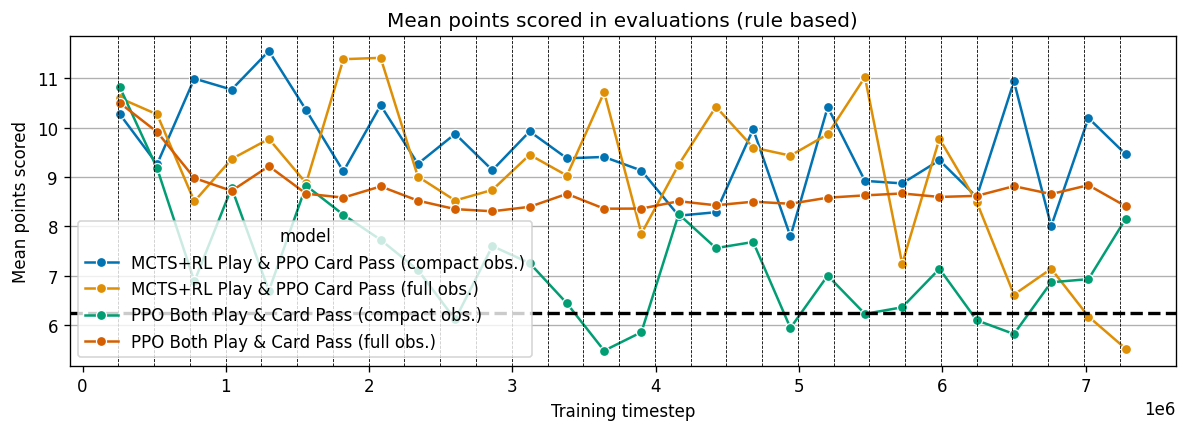

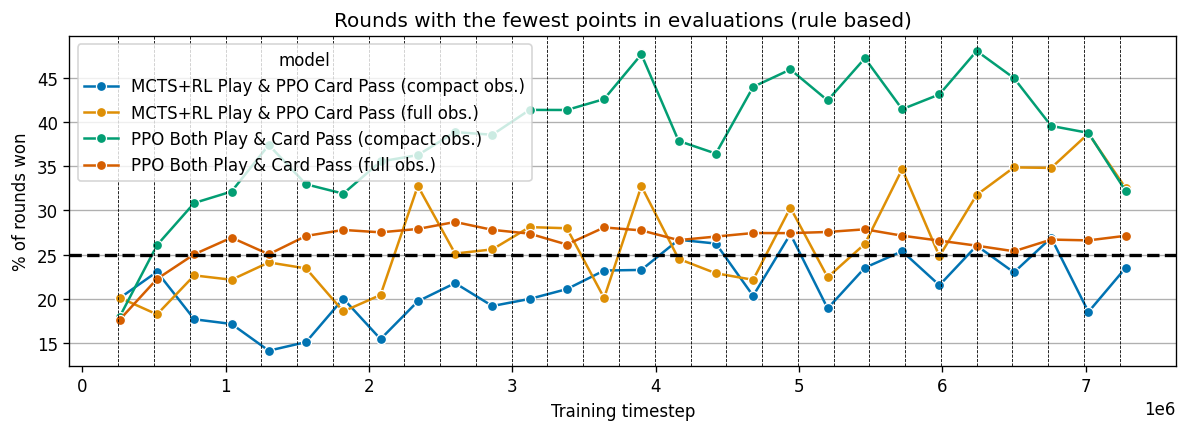

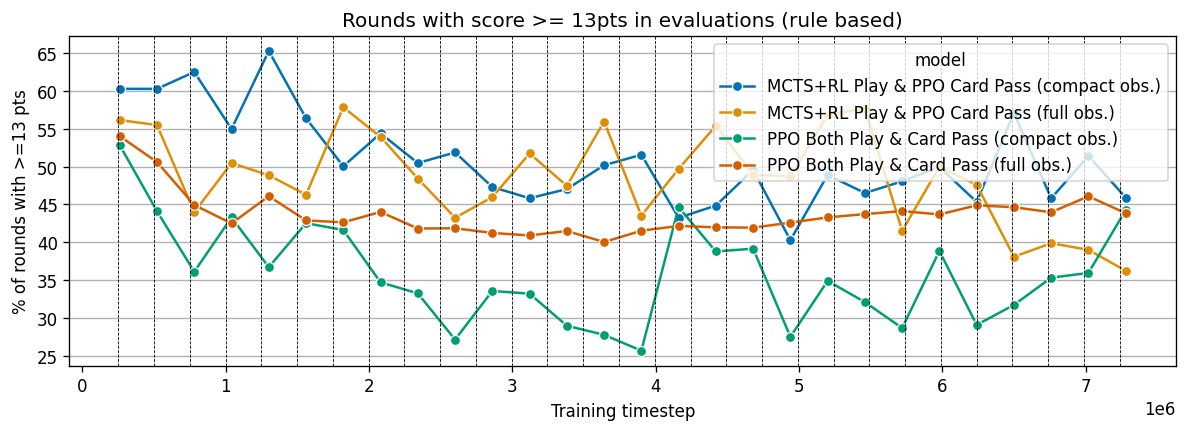

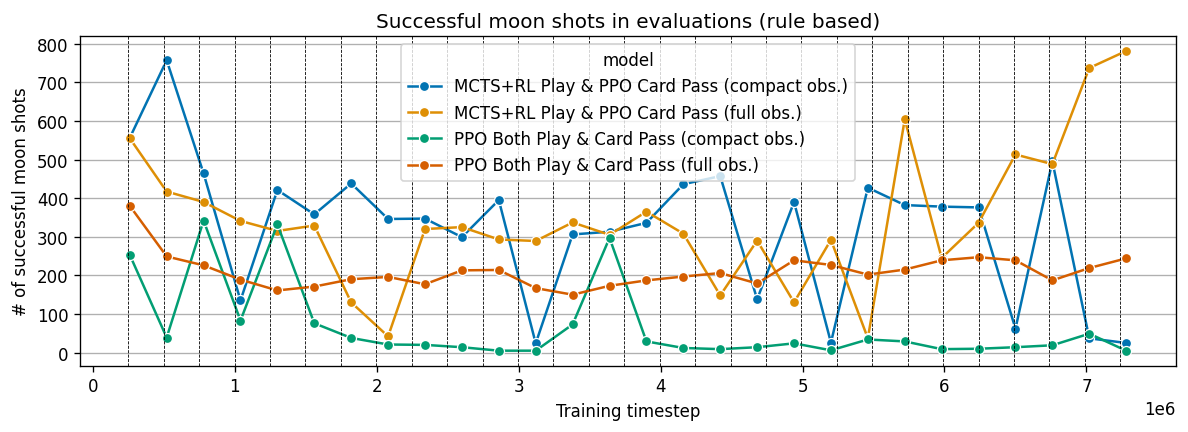

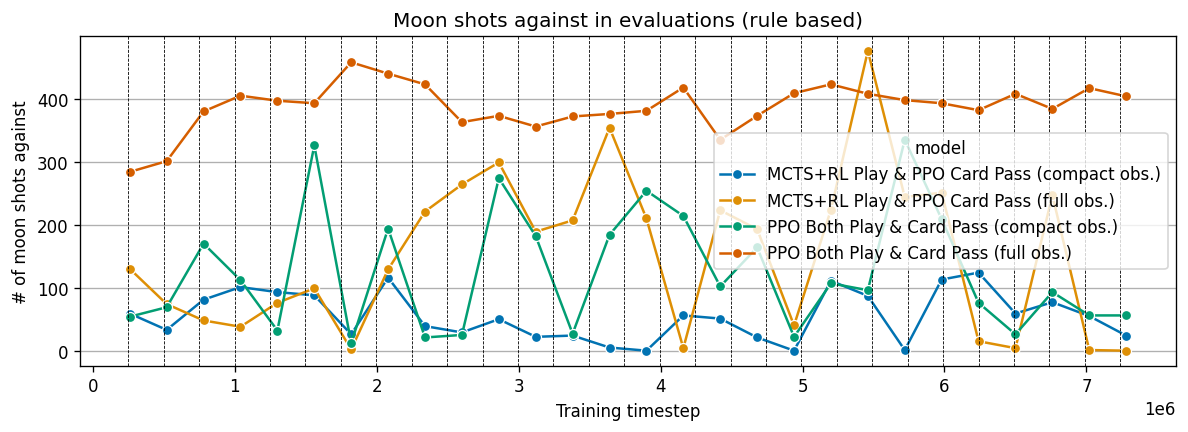

In [11]:
plot_maker_compare.plot_eval('rule_based')

# Identify the agents to be used in final evaluation

In [12]:
from hearts_ai.rl.training.common import SHARED_N_STEPS_PLAY, SHARED_N_STEPS_CARD_PASS

In [13]:
card_pass_tune_interval = SHARED_N_STEPS_PLAY * 20

### MCTS+RL (full)

In [14]:
print_best_eval_run(r_mctsrl_full, eval_id='rule_based')

The best evaluation occurred during 'run_1'
eval_no=28 | train_timestep=7280000
episode_reward=-5.52 +/- 11.81)


In [15]:
card_pass_location = int((7280000 / card_pass_tune_interval) * SHARED_N_STEPS_CARD_PASS)
print(f'Best eval had a card passing agent trained for less than {card_pass_location} steps')

Best eval had a card passing agent trained for less than 224000 steps


### MCTS+RL (compact)

In [16]:
print_best_eval_run(r_mctsrl_compact, eval_id='rule_based')

The best evaluation occurred during 'run_1'
eval_no=19 | train_timestep=4940000
episode_reward=-7.79 +/- 10.27)


In [17]:
card_pass_location = int((4940000 / card_pass_tune_interval) * SHARED_N_STEPS_CARD_PASS)
print(f'Best eval had a card passing agent trained for less than {card_pass_location} steps')

Best eval had a card passing agent trained for less than 152000 steps


### PPO (full)

In [18]:
print_best_eval_run(r_ppo_full, eval_id='rule_based')

The best evaluation occurred during 'run_1'
eval_no=11 | train_timestep=2860000
episode_reward=-8.31 +/- 9.63)


In [19]:
card_pass_location = int((2860000 / card_pass_tune_interval) * SHARED_N_STEPS_CARD_PASS)
print(f'Best eval had a card passing agent trained for less than {card_pass_location} steps')

Best eval had a card passing agent trained for less than 88000 steps


### PPO (compact)

In [20]:
print_best_eval_run(r_ppo_compact, eval_id='rule_based')

The best evaluation occurred during 'run_1'
eval_no=14 | train_timestep=3640000
episode_reward=-5.48 +/- 9.29)


In [21]:
card_pass_location = int((3640000 / card_pass_tune_interval) * SHARED_N_STEPS_CARD_PASS)
print(f'Best eval had a card passing agent trained for less than {card_pass_location} steps')

Best eval had a card passing agent trained for less than 112000 steps
